In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [17]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.03
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 3.78512277,  1.42522662, -1.06708623,  2.89182239,  3.44877826,
        3.00235353,  2.03094601,  2.42231252,  4.80718053, 10.30447819])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


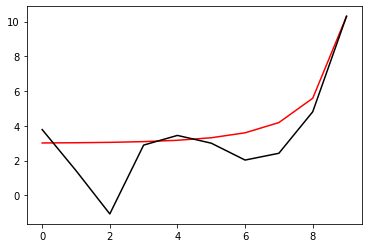

In [18]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [19]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-1.436485095144488>


In [7]:
def F_func(m, a,b):
    return 2*b/n_fin-m*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [8]:
def LP2(hh, m, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]]), print(len(Positive))
            else: continue
    return Positive
def NN_func_n(hh, m):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [9]:
Positive=NN_func_p(h_real, m2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [10]:
Negative=NN_func_n(h_real, m2)

In [20]:
[Positive0, Positive1]=NN_func_01(h, m2_2, Positive)
[Negative0, Negative1]=NN_func_01(h, m2_2, Negative)

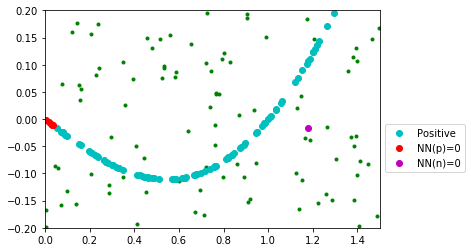

In [21]:
x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [13]:
def Error_func(hh, m):
    phi0=np.array([v[0] for v in Positive])
    pi0=np.array([v[1] for v in Positive])
    phi1=np.array([v[0] for v in Negative])
    pi1=np.array([v[1] for v in Negative])
    phi_0, pi_0=LP2(hh, m, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [22]:
print(Error_func(h_real, m2))
print(Error_func(h, m2_2))

tf.Tensor(2.20570471373324, shape=(), dtype=float64)
tf.Tensor(96.36079154582227, shape=(), dtype=float64)


In [23]:
def run():
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2) #돌리기전에 Error함수 수정 잊지말것
        gradients=g.gradient(loss, [h, m2_2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2]))

100 94.74189470627644 -1.3769759897958
[ 3.76290816  1.44807339 -0.99841681  2.723854    3.26708486  2.80407455
  1.82690798  2.21613307  4.60024765 10.10468163]


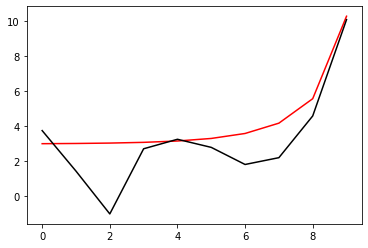

200 94.60186014055664 -1.3766912369633448
[ 3.6986571   1.46858995 -0.88463704  2.6469455   3.18803849  2.71970648
  1.73857717  2.12474365  4.50681793 10.00478161]


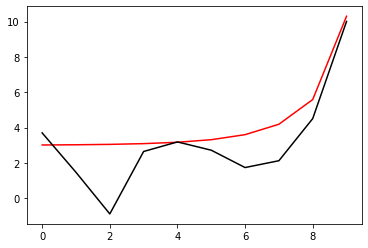

300 94.47093770976619 -1.3768307899453065
[ 3.63180897  1.50954624 -0.77039174  2.56936538  3.10854222  2.6358925
  1.65146843  2.0350747   4.41554439  9.90495584]


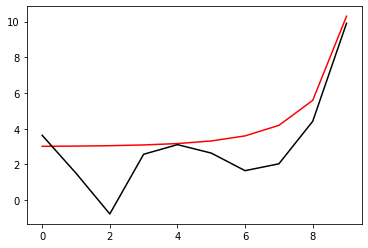

400 94.33069014082704 -1.3769364852859525
[ 3.56726297  1.56546416 -0.65973536  2.48956801  3.02383801  2.54640813
  1.55846952  1.93952368  4.31841591  9.80518164]


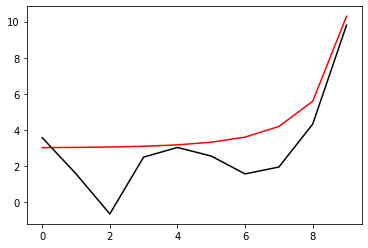

500 94.13070695201104 -1.3772221192755147
[ 3.5155677   1.64455217 -0.55204136  2.40213971  2.92213103  2.43703279
  1.44421435  1.82233427  4.19934438  9.7052756 ]


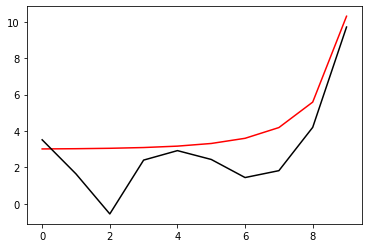

600 93.67673534698054 -1.3788223472405723
[ 3.50631796  1.77317179 -0.4468388   2.29205751  2.777826    2.27966695
  1.27983254  1.65458829  4.02933161  9.60475309]


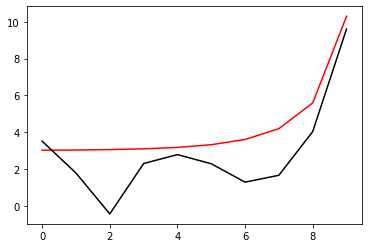

700 92.44199315403401 -1.3836615007249693
[ 3.59606033  1.95994891 -0.35291345  2.13436519  2.57059546  2.0591133
  1.05295369  1.4250517   3.79800214  9.5027869 ]


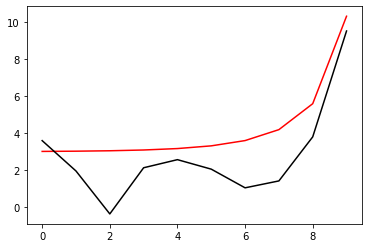

800 90.78473183056725 -1.389685542398403
[ 3.73222312  2.12942003 -0.28630298  1.95941461  2.36442567  1.84637647
  0.83680682  1.20727614  3.5792214   9.39910627]


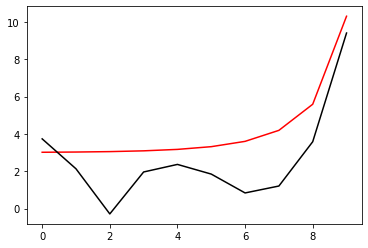

900 89.68663434291676 -1.393944320551272
[ 3.82125701  2.23986781 -0.22705804  1.81945997  2.21096595  1.68990816
  0.67818237  1.0473029   3.41849501  9.29463022]


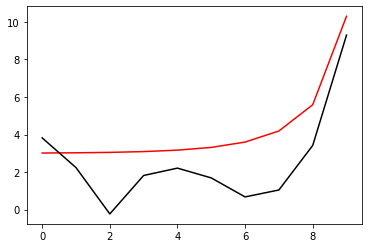

1000 89.04346480976747 -1.3956393528867028
[ 3.85412785  2.30165097 -0.16606163  1.71047498  2.09651691  1.57399777
  0.56065164  0.92853233  3.29907643  9.1903001 ]


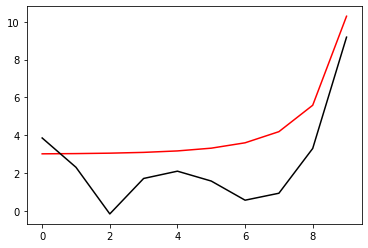

1100 88.61461493245712 -1.3951712221719164
[ 3.83992642  2.32974782 -0.10252977  1.61988317  2.00369442  1.48022463
  0.46531397  0.83184343  3.20168521  9.08656344]


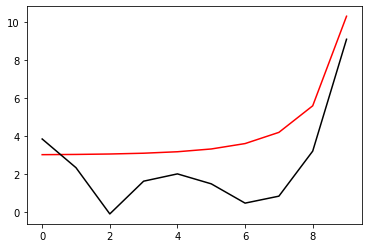

1200 88.28579831062015 -1.3941327864855695
[ 3.80243422  2.34542621 -0.02921005  1.54119768  1.92308611  1.39845822
  0.38171916  0.74663148  3.11560466  8.98355623]


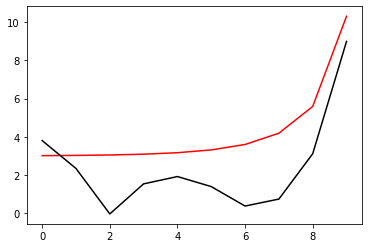

1300 88.01322117397761 -1.393059135391597
[3.75452374 2.35768253 0.05326162 1.47083267 1.85010727 1.32395695
 0.30507253 0.6680902  3.03601636 8.88128129]


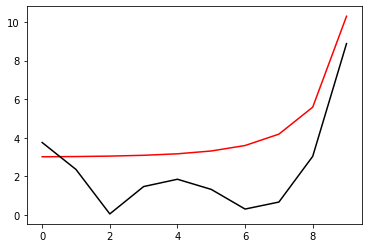

1400 87.78409462518826 -1.392241954005187
[3.70093578 2.3719437  0.14752453 1.40895665 1.78407528 1.2557051
 0.23415552 0.59485305 2.96144764 8.77970241]


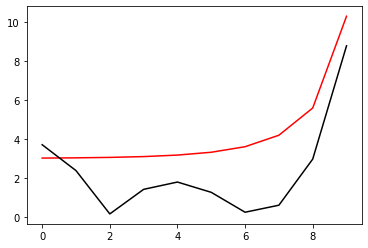

1500 87.5994270891715 -1.3918552408517824
[3.63979483 2.39190183 0.25937026 1.35910828 1.72739252 1.19545822
 0.17029212 0.52790451 2.89264338 8.6787921 ]


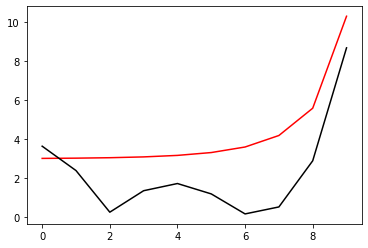

1600 87.45931218513594 -1.3917220326015305
[3.5637419  2.41553491 0.38882399 1.3253321  1.68322295 1.14579393
 0.11563836 0.46905235 2.8311678  8.57855501]


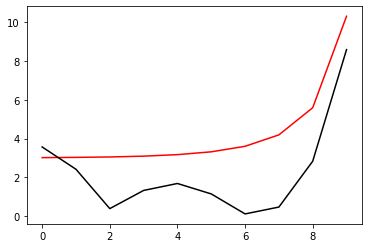

1700 87.35500601408275 -1.3916056193350415
[3.47057377 2.43843551 0.52814547 1.30880426 1.65250938 1.10750926
 0.07087077 0.41886227 2.7775129  8.47902203]


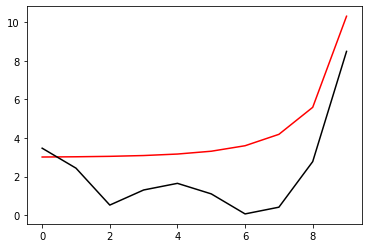

1800 87.27477803554352 -1.3914368768738394
[3.36691464 2.45799939 0.66787485 1.30722644 1.63335832 1.0790366
 0.03464333 0.37615794 2.7306268  8.38022345]


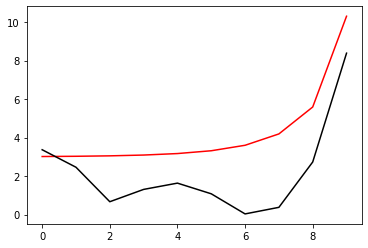

1900 87.21037618367139 -1.391124342706636
[3.26110433e+00 2.47299304e+00 8.01585179e-01 1.31673386e+00
 1.62267863e+00 1.05783047e+00 4.78773901e-03 3.39067359e-01
 2.68884979e+00 8.28216944e+00]


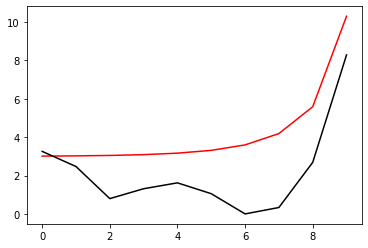

2000 87.15699078830946 -1.390984829963441
[ 3.15890948  2.48317581  0.92663197  1.33386132  1.61775253  1.04166223
 -0.02058607  0.30596636  2.65074649  8.18484858]


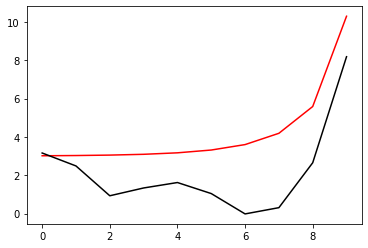

2100 87.11208928491754 -1.3907315857533933
[ 3.06257136  2.48857166  1.04265243  1.35611403  1.6166786   1.0289878
 -0.04277671  0.2757466   2.61534272  8.08823544]


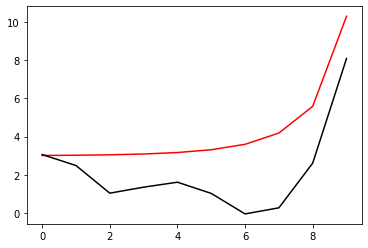

2200 87.07390483367536 -1.3904730251823727
[ 2.97293233  2.48958834  1.15020072  1.3818911   1.61826034  1.01883738
 -0.0625968   0.2477155   2.58202975  7.99229837]


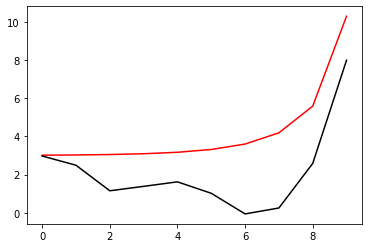

2300 87.04122119298985 -1.3902130582334966
[ 2.88993615  2.48667788  1.25004602  1.41015372  1.62174772  1.01060801
 -0.08054697  0.22144834  2.55043525  7.89700452]


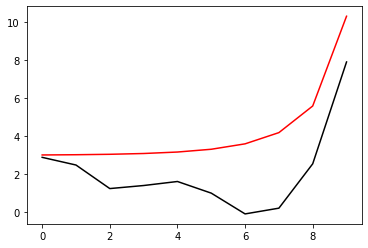

2400 87.01311658408628 -1.3899541209279331
[ 2.81317145  2.48033385  1.3429352   1.44021195  1.62665999  1.00391472
 -0.09694478  0.1966756   2.52032234  7.80232246]


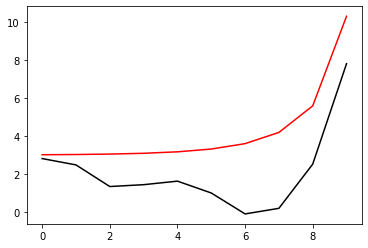

2500 86.98886529631346 -1.3896976488013122
[ 2.74211065  2.47105778  1.42951098  1.47158423  1.632673    0.99849722
 -0.11200465  0.17321376  2.49152819  7.70822321]


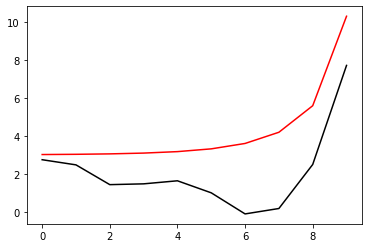

2600 86.96788174836715 -1.3894445518695886
[ 2.67621296  2.45933999  1.51030381  1.50391808  1.63955671  0.99416823
 -0.12588201  0.15092733  2.46393038  7.61468055]


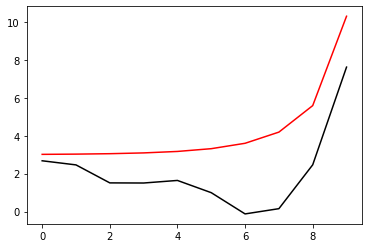

2700 86.94968517115538 -1.3891954507015618
[ 2.61496559  2.44564653  1.58574697  1.53694576  1.64714116  0.99078573
 -0.13869681  0.12970866  2.43742921  7.52167095]


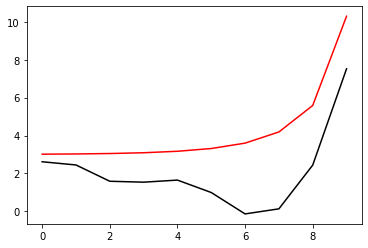

2800 86.93387570822554 -1.3889507929536629
[ 2.55789895  2.43040972  1.656196    1.57045853  1.65529768  0.98823777
 -0.15054625  0.1094673   2.41193846  7.4291733 ]


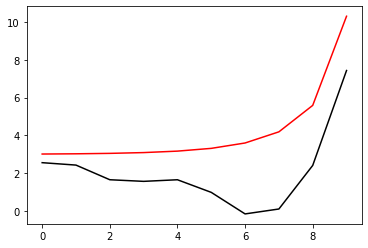

2900 86.92011744542016 -1.3887109127505257
[ 2.50459098  2.41402131  1.72194623  1.60429078  1.66392791  0.98643392
 -0.1615117   0.09012428  2.38738057  7.33716864]


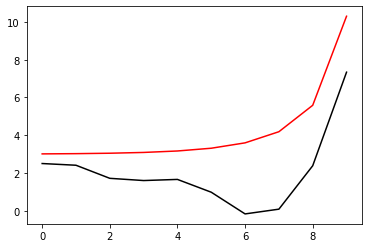

3000 86.90812592851546 -1.388476063548402
[ 2.45466723  2.39682813  1.78324713  1.63830934  1.67295693  0.98530007
 -0.17166271  0.07160892  2.36368409  7.24563994]


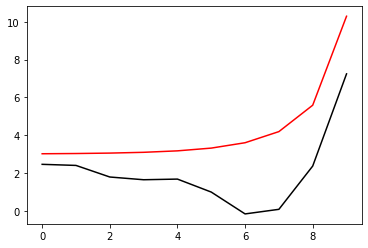

3100 86.89765873494737 -1.388246438519058
[ 2.40779896  2.37913     1.84031348  1.67240584  1.68232868  0.98477519
 -0.18105953  0.05385701  2.34078222  7.15457181]


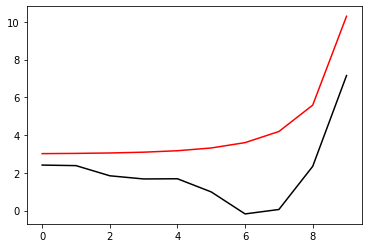

3200 86.88850820492577 -1.3880221845094909
[ 2.3637004   2.36117953  1.89333414  1.70649088  1.69200256  0.98480902
 -0.18975469  0.03680969  2.31861204  7.06395033]


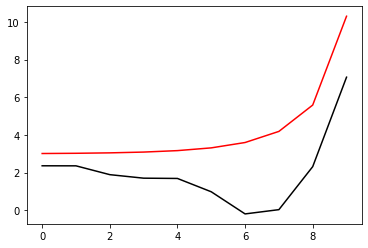

3300 86.88049574375043 -1.3878034120848006
[ 2.32212539  2.34318366  1.94247874  1.74048945  1.70195094  0.98536041
 -0.19779415  0.02041265  2.29711398  6.97376287]


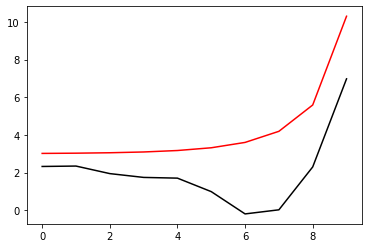

3400 86.8734672910524 -1.3875902027172486
[ 2.28286356e+00  2.32530662e+00  1.98790291e+00  1.77433716e+00
  1.71215697e+00  9.86396019e-01 -2.05218135e-01  4.61561780e-03
  2.27623147e+00  6.88399794e+00]


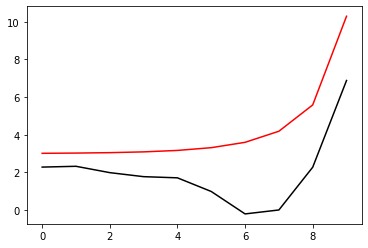

3500 86.86728966935287 -1.3873826136653644
[ 2.24573627  2.30767379  2.0297524   1.80797718  1.72261286  0.98788924
 -0.21206184 -0.01062806  2.25591076  6.79464506]


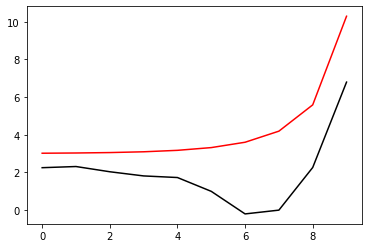

3600 86.86184760250204 -1.3871806809409506
[ 2.21059235  2.29037637  2.06816622  1.84135768  1.73331832  0.98981931
 -0.21835597 -0.02536176  2.23610063  6.70569468]


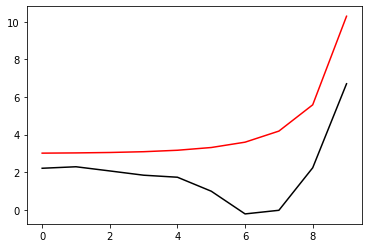

3700 86.85704124941684 -1.3869844207464472
[ 2.1773039   2.27347628  2.10327925  1.87442975  1.74427913  0.99217055
 -0.22412727 -0.03962592  2.21675225  6.61713804]


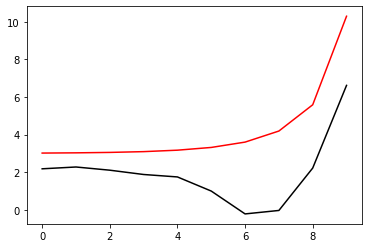

3800 86.85278413824763 -1.3867938297798716
[ 2.14576205  2.25701127  2.13522411  1.90714568  1.75550594  0.99493167
 -0.22939894 -0.05345827  2.197819    6.52896716]


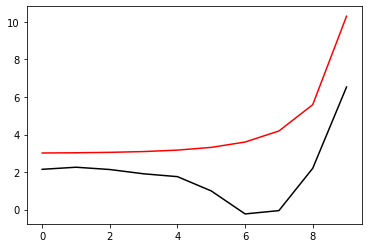

3900 86.84900141530646 -1.3866088848101843
[ 2.11587313  2.24099974  2.16413278  1.93945767  1.76701307  0.99809517
 -0.23419102 -0.0668941   2.17925634  6.44117471]


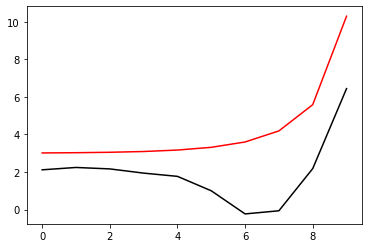

4000 86.84562834464822 -1.3864295419097115
[ 2.08755506  2.22544532  2.19013774  1.9713168   1.77881745  1.00165684
 -0.23852071 -0.07996648  2.1610216   6.353754  ]


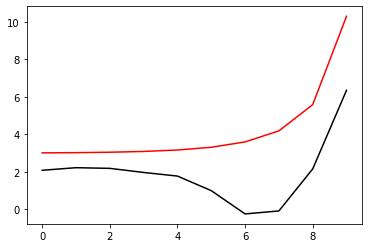

4100 86.84260901008544 -1.3862557356901697
[ 2.06073421  2.21034083  2.21337276  2.00267242  1.79093766  1.00561529
 -0.24240272 -0.09270644  2.14307392  6.2666989 ]


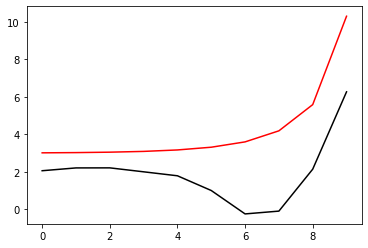

4200 86.83989518312536 -1.3860873788285388
[ 2.03534275  2.19567185  2.23397353  2.03347175  1.80339302  1.00997154
 -0.24584948 -0.1051432   2.12537405  6.18000381]


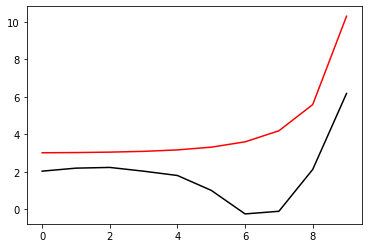

4300 86.83744532898959 -1.38592436209423
[ 2.01131647  2.18141947  2.25207785  2.06365978  1.81620277  1.01472875
 -0.24887137 -0.11730425  2.10788429  6.09366361]


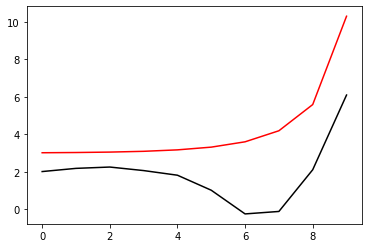

4400 86.83522372938546 -1.385766555007301
[ 1.98859314  2.16756263  2.26782566  2.09317948  1.82938526  1.01989187
 -0.25147693 -0.12921554  2.09056838  6.00767363]


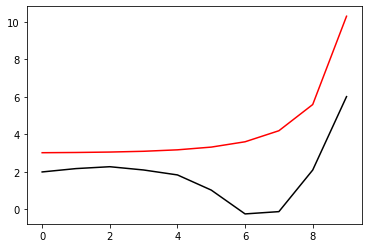

4500 86.8331997056646 -1.3856138071758213
[ 1.96711134  2.15407978  2.28135879  2.12197213  1.84295734  1.02546745
 -0.25367295 -0.14090157  2.07339137  5.92202962]


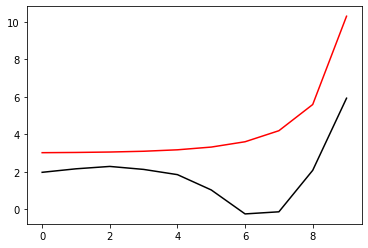

4600 86.8313469298517 -1.3854659502861881
[ 1.94680966  2.14095011  2.29282048  2.14997797  1.85693363  1.03146348
 -0.25546467 -0.1523855   2.05631958  5.83672771]


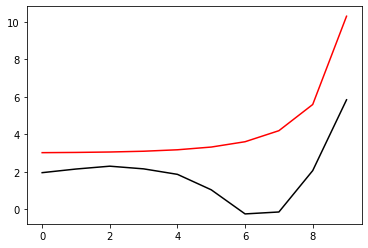

4700 86.82964281399862 -1.3853228006580212
[ 1.9276264   2.12815431  2.3023546   2.17713693  1.87132604  1.03788916
 -0.25685576 -0.16368919  2.0393205   5.75176437]


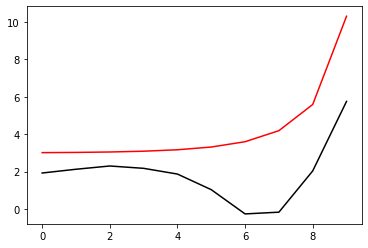

4800 86.82806797056674 -1.385184162229347
[ 1.90949945  2.11567497  2.31010481  2.20338952  1.8861432   1.0447549
 -0.25784847 -0.17483332  2.02236275  5.66713642]


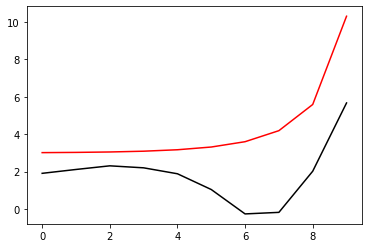

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()